

# Project: Investigate a Dataset (<a href="https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&ust=1510938699779000&usg=AFQjCNEhCPgwHa9F0nFQ8g3mGI0qQSncxg">TMDb Movie Data</a>)

### https://github.com/connectaditya/Data-Analyst-Nanodegree/tree/master/Investigate_a_Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
#### Dataset
> I choose the TMDb movie data set for data analysis. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.I would like to find other intresting patterns in the dataset.
>

## Approach
1.Preview and clean the data.

   >Remove unnecessary information that are not useful for analysis
   >Inspection for any null and duplicated values
   >Change data types if needed

2.Explore the data and draw conclusion to answer questions.

   >Study the stats to find meaningful information.
   >Group and filter certain data to find important patterns
   >Plot above data and make visualization to show the results.


In [52]:
# Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as snst
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [53]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('tmdb-movies.csv')
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09




### Data Cleaning (Replace this with more specific notes!)

First step is to assess the dataset structure to gather the basic information about the data we are dealing with

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [55]:
df.shape

(10866, 21)

#### Check for Missing values


In [56]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### Check for duplicated values


In [57]:
df.duplicated().sum()

1

In [58]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

#### Drop the  missing values


In [59]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# cleaning missing features
df.dropna(subset=['imdb_id','cast','director','genres','homepage','tagline','keywords','production_companies'], how='any', inplace = True)
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

#### Remove duplicated values


In [60]:
# drop duplicates
df = df.drop_duplicates(keep=False)
df.duplicated().sum()

0

#### Check for dataset properties after cleaning


In [61]:
df.shape

(1992, 21)

#### Remove unnecessary characters from imdb_id. 
In below code, the int values from the imdb_id cells were extracted and the imdb_id column was replaced by the cleaned data of imdb_id


In [62]:
# remove unnecessary characters from the imdb_id column and change the column type to int

df['imdb_id'] = df['imdb_id'].str.extract('(\d+)').astype(int)
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Saving the cleaned dataset


In [63]:
# save the cleaned data to 'clean_tmdb_movies.csv'
df.to_csv('clean_tmdb_movies.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (What are the Top 10 Movies!)

#### Read the clean dataset and fetch the largest 10 vote_average values to obtain the top 10 rated movies


In [64]:
#Read the cleaned dataset
df_clean = pd.read_csv('clean_tmdb_movies.csv')
#Get a list of the top 10 movies
df_top10 = df_clean.nlargest(10,'vote_average')

df_top10.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1702,238,68646,5.738034,6000000,245066411,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,http://www.thegodfather.com/,Francis Ford Coppola,An offer you can't refuse.,...,"Spanning the years 1945 to 1955, a chronicle o...",175,Drama|Crime,Paramount Pictures|Alfran Productions,3/15/72,3970,8.3,1972,3.128737e+07,1.277914e+09
181,244786,2582802,4.780419,3300000,13993093,Whiplash,Miles Teller|J.K. Simmons|Melissa Benoist|Aust...,http://sonyclassics.com/whiplash/,Damien Chazelle,The road to greatness can take you to the edge.,...,"Under the direction of a ruthless instructor, ...",105,Drama|Music,Bold Films|Blumhouse Productions|Right of Way ...,10/10/14,2372,8.2,2014,3.039600e+06,1.288891e+07
717,55244,1621444,0.052322,0,1339650,Bill Cunningham New York,Bill Cunningham|Tom Wolfe|Anna Wintour|Carmen ...,http://billcunninghamnewyork.com/,Richard Press,"He who seeks beauty, will find it.",...,Chronicles a man who is obsessively interested...,84,Documentary,First Thought Films,3/24/10,16,8.1,2010,0.000000e+00,1.339650e+06
719,550,137523,8.947905,63000000,100853753,Fight Club,Edward Norton|Brad Pitt|Meat Loaf|Jared Leto|H...,http://www.foxmovies.com/movies/fight-club,David Fincher,How much can you know about yourself if you've...,...,A ticking-time-bomb insomniac and a slippery s...,139,Drama,Regency Enterprises|Fox 2000 Pictures|Taurus F...,10/14/99,5923,8.1,1999,8.247033e+07,1.320229e+08
762,155,468569,8.466668,185000000,1001921825,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,http://thedarkknight.warnerbros.com/dvdsite/,Christopher Nolan,Why So Serious?,...,Batman raises the stakes in his war on crime. ...,152,Drama|Action|Crime|Thriller,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,7/16/08,8432,8.1,2008,1.873655e+08,1.014733e+09


#### Plot the Top 10 Movies by Rating


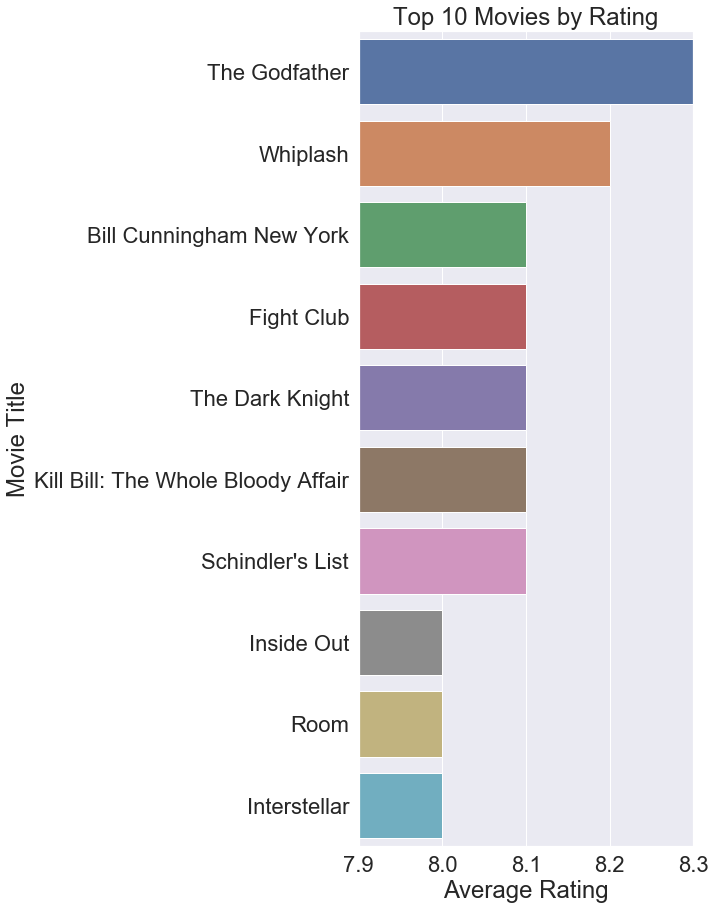

In [65]:
#Plot the top 10 movies
sns.set(style="whitegrid");
sns.set(font_scale=2);
f, ax = plt.subplots(figsize=(6, 15));
ax = sns.barplot(x='vote_average', y='original_title', data=df_top10);

ax.set(xlim=(7.9,8.3), ylabel="Movie Title", xlabel="Average Rating");
plt.title('Top 10 Movies by Rating');

As shown in the plot above, the top rated movie is The Godfather with a rating of 8.3


### Additional Research Question  (What is the distribution of average movies ratings!)
In addition to the Top 10 movies, it is also interesting to see the average rating of movies by count and categorize the rating given to movies.

In this case i am assigning different rating category as follows:

    - "High" to movies between max and 75% values
    - "Above Average" to movies between 50% and 75% values
    - "Medium" to movies between 25% and 50% values
    - "Low" to movies less than 25% value

A column has been added ("movie_rating") to store the values of the rating categories

#### use of describe() to obtain the rating averages


In [66]:
#Obtain details of the vote_average edges
df_clean.describe()['vote_average']


count    1992.000000
mean        6.178614
std         0.881955
min         2.100000
25%         5.600000
50%         6.200000
75%         6.800000
max         8.300000
Name: vote_average, dtype: float64

#### Assign the bin_edges to the obtained rating averages
#### Add a column named "movie_rating" to store the category of the ratings ('Low','Medium','Above Average','High')



In [67]:
bin_edges = [2.1,5.6,6.2,6.8,8.3] # values of vote_averages min, 25%, 50%, 75%, max
bin_names = ['Low','Medium','Above Average','High'] # Name of categories
df_clean['movie_rating'] = pd.cut(df_clean['vote_average'], bin_edges, labels=bin_names)
df_clean.head()



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,movie_rating
0,135397,369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Above Average
1,76341,1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,High
2,262500,2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Above Average
3,140607,2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,High
4,168259,2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,High


#### Get the count of the movie_rating

#### Plot the rating distribution using bar type and seaborn style


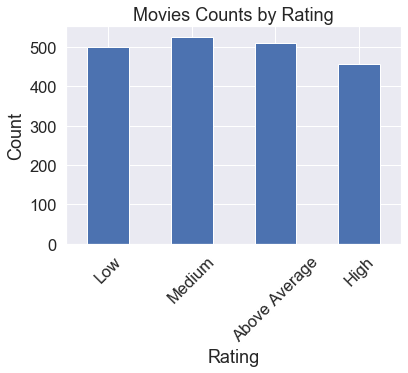

In [68]:
#Plot the rating distribution
counts = df_clean.groupby('movie_rating').count()['genres'];
sns.set_style("darkgrid")
sns.set(font_scale=1.5);
counts.plot(kind = 'bar', title = 'Movies Counts by Rating');

plt.xlabel('Rating', fontsize = 18);
plt.ylabel('Count', fontsize = 18);
plt.xticks(rotation=45);

#### Result in text


In [69]:
df_clean.groupby('movie_rating').count()['genres']

movie_rating
Low              499
Medium           526
Above Average    509
High             457
Name: genres, dtype: int64

As shown in the plot "Movies Counts by Rating", the distribution of the ratings is normal

### Research Question 2  (What is the Number of Produced Movies by Genres? What is the maximum production for each genre number in a year?)

#### For the first question (What is the Number of Produced Movies by Genres), the genre data is separated by "|" which needs to be splitted in order to further explore the answer
#### The mechanisim to perform the split is as follows:
#### 1. Create a dataset with the genre data splitted ("s")
#### 2. Create a copy of the original dataset ("df_new")
#### 3. Delete the column "genre" in the created copy
#### 4. Join the created copy with the splittd data
#### 5. Plot the count of genre per year ("chart_df")


C:\Users\Aadi\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Aadi\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, '# of Movies by Genres Per Year')

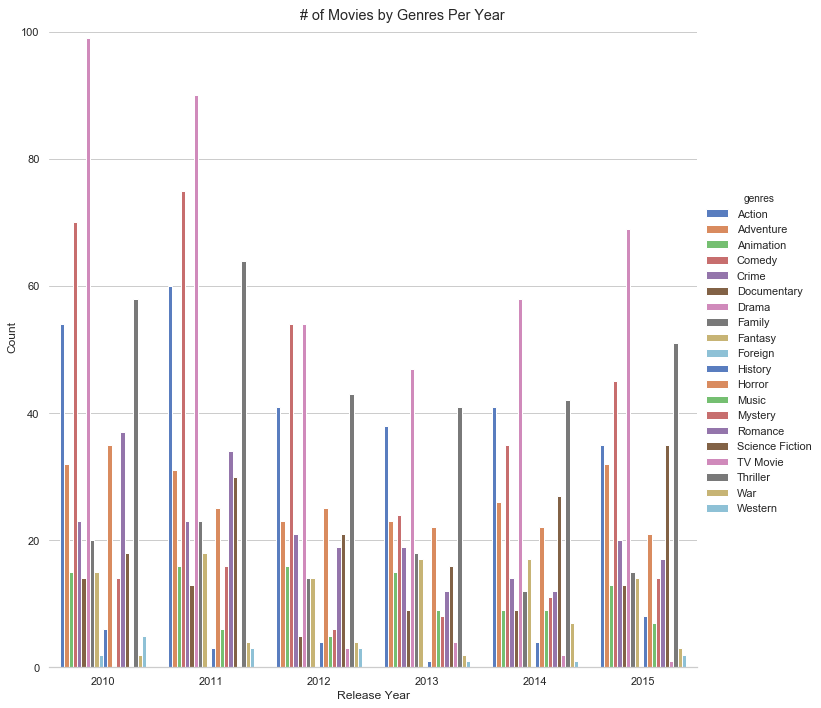

In [70]:

from pandas import Series
import numpy as np
#expand the genres column to rows since the genres of each movie is stored in one cell and separated by '|'
s = df_clean['genres'].str.split('|').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'

df_new = df_clean.copy() # create a copy of the df_clean dataset 
del df_new['genres']

df = df_new.join(s)

chart_df = df.groupby(['genres', 'release_year']).count()['director'].reset_index(name="count")
#chart_df = df.groupby('genres').count()['director'].reset_index(name="count")

sns.set(style="whitegrid");

#Plot 
g = sns.factorplot(x='release_year', y='count', hue='genres', data=chart_df.query('release_year >= 2010'),
                   size=10, kind="bar", palette="muted");
g.despine(left=True);
#g.set_title("Movies by Genres", fontsize=22, fontweight="bold")
g.set_ylabels("Count");
g.set_xlabels("Release Year");
g.fig.suptitle('# of Movies by Genres Per Year')


The above chart shows produced movies per genre per year, which is very difficult to read.
to further investigate the genre numbers, the below chart shows the total count of every genre produced across the dataset

#### For more clarity and making the data easier to read, another chart is plotted below which shows the movies counts by genre

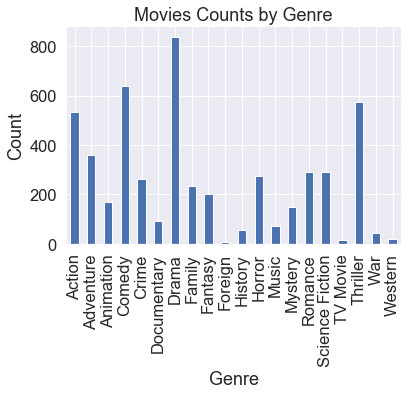

In [71]:
chart2_df = df.groupby('genres').count()['director']
sns.set_style("darkgrid")
sns.set(font_scale=1.5);
chart2_df.plot(kind = 'bar', title = 'Movies Counts by Genre');

plt.xlabel('Genre', fontsize = 18);
plt.ylabel('Count', fontsize = 18);
plt.xticks(rotation=90);

#### For the second question (What is the maximum production for each genre number in a year), a genre count was created using the idxmax() method to get the maximum number of the produced movie in a given year
#### A heatmap plot is used to illustrate the results

Text(0.5, 57.5, 'Release Year')

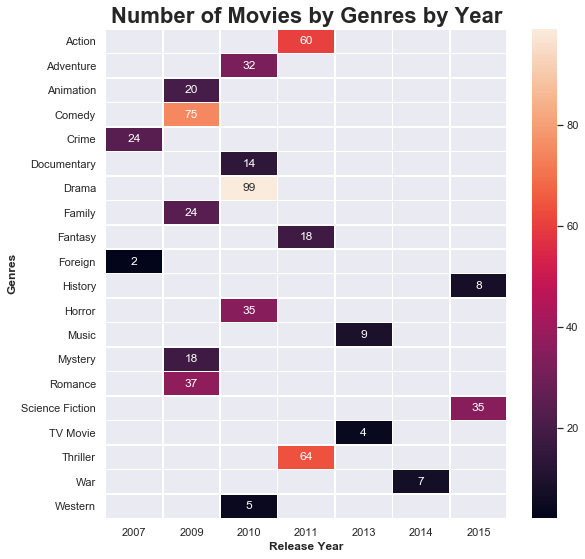

In [72]:
# get the maximum counts per genre per year
genres_count = chart_df.loc[chart_df.groupby(['genres'])['count'].idxmax()]

sns.set(style="darkgrid")

genres = genres_count.pivot("genres", "release_year", "count")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 9))
g = sns.heatmap(genres, annot=True,  linewidths=0.5, ax=ax)
g.set_title("Number of Movies by Genres by Year", fontsize=22, fontweight="bold")
g.set_ylabel("Genres", fontsize=12, fontweight="bold")
g.set_xlabel("Release Year", fontsize=12, fontweight="bold")

From the heatmap "Number of Movies by Genres by Year", the highiest genre of movies produced was Drama which was in 2010. the lowest genre of procedured movies was Foreign which was in 2007 

###### <a id='conclusions'></a>
## Conclusions

#### Summary
> **From the investegated data set "TMDb Movie Data", the follwing questions were explored:**

> 1. What are the Top 10 Movies by Rating?

> 2. What is the distribution of average movies ratings?

> 3. What is the Number of Produced Movies by Genres?

> 4. What is the maximum production for each genre number in a year?

> **Data Wrangling:**

> * Features with missing values were cleaned:
    - imdb_id
    - cast
    - homepage
    - director
    - tagline
    - keywords
    - overview
    - genres
    - production_companies
* 1 duplicated row was removed
* imdb_id data was cleaned by removing the unnecessary characters (tt)
* A new column "movie_rating" was added to store the data of the rating category (Low/Medium/Above Average/High)
* A clean dataset was saved in "clean_tmdb_movies.csv" 
* Data of the genres were expanded to split the values of the genre which were stored in cells separated by "|" to answer questions 3 and 4


There are some potential limitations to the analysis presented in this work and there are some potential areas were the given data could be explored such as:
* The correlation between high budget movies and given rating. Does highly budgeted movies always get high ratings?

#### Analysis vs. Results

>The analysis presented in this work sheet did answer my posed questions, I have included the answers to those questions in text below:

>**1. What are the Top 10 Movies by Rating?**

>        1. The Godfather
        2. Whiplash
        3. Bill Cunningham New York
        4. Fight Club
        5. The Dark Knight
        6. Kill Bill: The Whole Bloody Affair
        7. Schindler's List
        8. Inside Out
        9. Room
        10.Intersteller

>**2. What is the distribution of average movies ratings?**

>        The average rating is fairly distributed among the different rating categories (High, Above Average, Medium, Low)
>        On average,
>        Low              499 Movies
>        Medium           526 Movies
>        Above Average    509 Movies
>        High             457 Movies
        
>**3. What is the Number of Produced Movies by Genres?**

>     For this question, the cells containig genres was splitted to rows since genres was stored in one cell 
>     separated by '|'.
>     The chart "# of Movies by Genres Per Year" has been customized to show the counts for 5 years (2010-2015).
>     The chart is too condensed and very difficult to read. However, another chart was plotted to show the number of 
>     produced moveis. Result is below:
     
        
>        Action             532
>        Adventure          361
>        Animation          170
>        Comedy             640
>        Crime              262
>        Documentary         93
>        Drama              838
>        Family             233
>        Fantasy            202
>        Foreign              6
>        History             56
>        Horror             273
>        Music               72
>        Mystery            148
>        Romance            291
>        Science Fiction    291
>        TV Movie            16
>        Thriller           575
>        War                 44
>        Western             20

>**4. What is the maximum production for each genre number in a year?**

>        As shown in the heatmap plot, there were:
        
>        Action Movies were highly produced in 2011 (60 Movies)
>        Adventure Movies were highly produced in 2010 (32 Movies)
>        Animation Movies were highly produced in 2009 (20 Movies)
>        Comedy Movies were highly produced in 2007 (75 Movies)
>        Crime Movies were highly produced in 2009 (24 Movies)
>        Documentary Movies were highly produced in 2010 (14 Movies)
>        Drama Movies were highly produced in 2010 (99 Movies)
>        Family Movies were highly produced in 2009 (24 Movies)
>        Foreign Movies were highly produced in 2007 (2 Movies)
>        History Movies were highly produced in 2015 (8 Movies)
>        Horror Movies were highly produced in 2010 (35 Movies)
>        Music Movies were highly produced in 2013 (9 Movies)
>        Mystery Movies were highly produced in 2009 (18 Movies)
>        Romance Movies were highly produced in 2009 (37 Movies)
>        Science Fiction Movies were highly produced in 2015 (35 Movies)
>        TV Movie Movies were highly produced in 2013 (4 Movies)
>        Thriller Movies were highly produced in 2011 (64 Movies)
>        War Movies were highly produced in 2014 (7 Movies)
>        Western Movies were highly produced in 2010 (5 Movies)
        

In [73]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0